## Machine Learning model for  CO2 emisssion
Dataset available at: https://www.kaggle.com/gangliu/oc2emission/tasks

This dataset contains information of CO2 emission from cars. This model was produced based on the 'AI Crash Course', by Diego Cortis, available on YouTube: https://youtu.be/Ze-Q6ZNWpco 

Question to be answered: what is the correlation between the engine motor of the car and its CO2 emission? Is it possible to create a model that predicts the amount of polution on future motors?

In [2]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [3]:
# atributing dataset to a dataframe df
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# describing statiscal measures
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Exploratory analysis


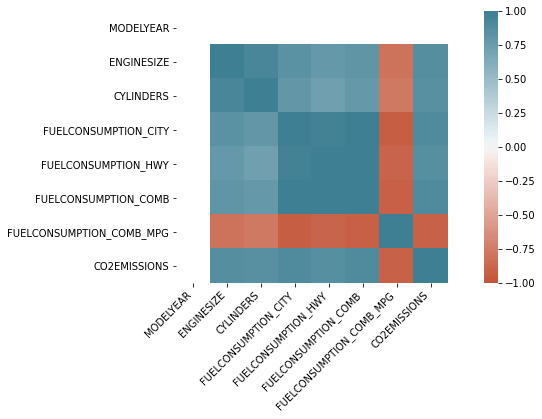

In [5]:
# correlation matrix to measure the strenght of the correlation between features
plt.figure(figsize=(13,5))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

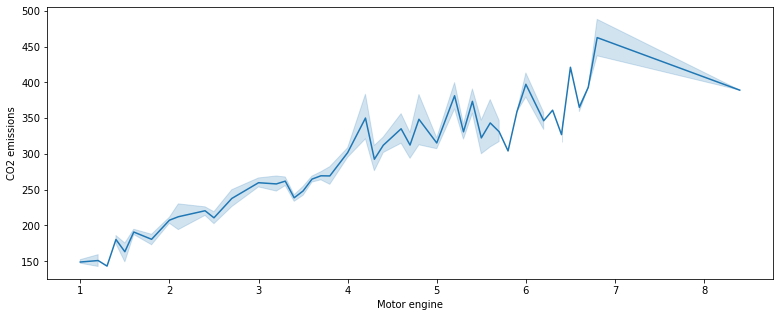

In [6]:
# ploting graph engine size x CO2 emissions
plt.figure(figsize=(13,5))
sns.lineplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])
plt.xlabel('Motor engine')
plt.ylabel('CO2 emissions')
plt.show()

The lineplot shows a positive correlation between the size/power of the engine motor and the carbon emission. With some variation, we can say that the bigger the engine the greater the levels of CO2 emited. 

### Spliting data to train the model

In [7]:
# importing necessary libraries
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [16]:
# features into variables
engine= df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]

In [29]:
# spliting data in train and test with train_test_split
engine_treino, engine_test, co2_treino, co2_test = train_test_split(engine, co2, test_size=0.2, random_state=42)

In [30]:
print(type(engine_treino))

<class 'pandas.core.frame.DataFrame'>


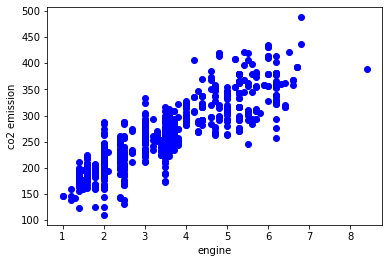

In [31]:
# ploting the correlation between features
plt.scatter(engine_treino, co2_treino, color='blue')
plt.xlabel('engine')
plt.ylabel('co2 emission')
plt.show()

The datapoints on the scatterplot indicates that is possible to do a linear regression with this dataset, although the amount of residual.

### Creating the model with the train dataset

In [32]:
# creating a linear regression model
# LinearRegression is a method of sklearn
modelo = linear_model.LinearRegression()

In [33]:
# linear regression formula: (Y = A + B.X)
# training the model to obtain the values of A and B (always do it in the train dataset)
modelo.fit(engine_treino, co2_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# exibiting the coeficients A and B that the model generated
print(f'(A) intercept: {modelo.intercept_} | (B) inclination: {modelo.coef_}')

(A) intercept: [126.28970217] | (B) inclination: [[38.99297872]]


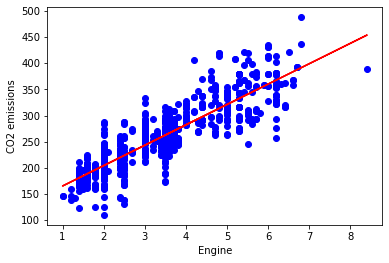

In [35]:
# print linear regression line on our TRAIN dataset
plt.scatter(engine_treino, co2_treino, color='blue')
plt.plot(engine_treino, modelo.coef_[0][0]*engine_treino + modelo.intercept_[0], '-r') 
# LR formula: inclination(B) * engine_treino(X) + intercept(A)
plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

### Executing the model on the test dataset
First: predictions on the 'test' dataset

In [28]:
predictCO2 = modelo.predict(engine_test)

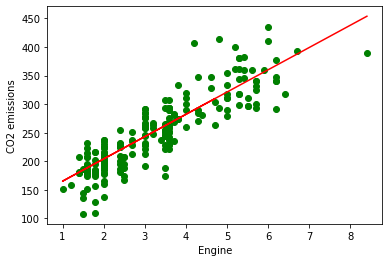

In [38]:
# print linear regression line on our TEST dataset
plt.scatter(engine_test, co2_test, color='green')
plt.plot(engine_test, modelo.coef_[0][0]*engine_test + modelo.intercept_[0], '-r')
plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

### Evaluating the model

In [49]:
# Showing metrics to check the acuracy of our model
print(f'Sum of squared error (SSE): {np.sum((predictCO2 - co2_test)**2)}') # SSE: sum all of the  residuals and square them. 
print(f'Mean squared error (MSE): {mean_squared_error(co2_test, predictCO2)}') # MSE: avg of SSE
print(f'Mean absolute error (MAE): {mean_absolute_error(co2_test, predictCO2)}')
print (f'Sqrt of mean squared error (RMSE):  {sqrt(mean_squared_error(co2_test, predictCO2))}') # RMSE: sqrt of the MSE
print(f'R2-score: {r2_score(predictCO2, co2_test)}') # r2-score: explains the variance of the variable Y when it comes to X

Sum of squared error (SSE): CO2EMISSIONS    210990.768215
dtype: float64
Mean squared error (MSE): 985.9381692274999
Mean absolute error (MAE): 24.09725741170784
Sqrt of mean squared error (RMSE):  31.399652374309813
R2-score: 0.6782015355440534


All of the metrics above help evaluate the acuracy of the model. r2, for instance, is 0.68: this means that our linear regression model (values A and B given) is able to explain 68% of the variance between the CO2 emission and engine of the cars. 

The usual benchmark for this metric is 0.70.